# Technique: 03 Distribution Fitting Box-Cox

### What is this?
Sometimes data is "skewed." This means most numbers are small, but a few are very large (it leans to one side). Box-Cox is a tool that fixes this. It changes the data to look like a **Normal Distribution** (a balanced bell shape).

### Why use it?
1. Many Machine Learning models work better if the data looks like a "Normal Distribution."
2. It makes it easier to see patterns in skewed data, like `Household_Size` or `Savings`.

### Rule:
* Box-Cox only works for **positive numbers** (numbers greater than 0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245


Original Household Size (First 5 rows):
0    2.219505
1    1.967882
2    1.828750
3    1.772328
4    3.174114
Name: Household_Size, dtype: float64


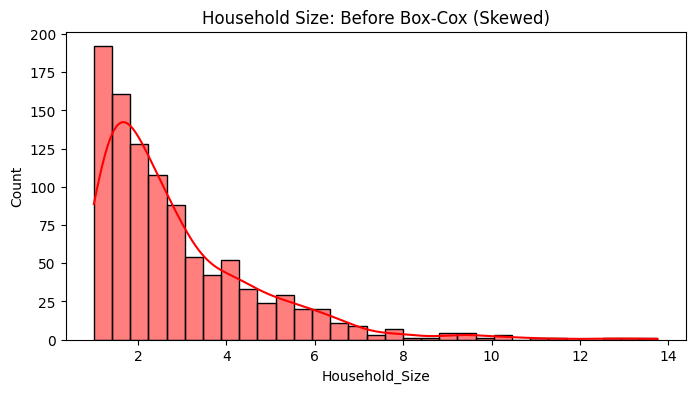

In [2]:
print("Original Household Size (First 5 rows):")
print(df['Household_Size'].head())

plt.figure(figsize=(8, 4))
sns.histplot(df['Household_Size'], kde=True, color='red')
plt.title("Household Size: Before Box-Cox (Skewed)")
plt.show()

## How the Box-Cox Transform works
We use a value called **Lambda ($\lambda$)**. 
* If $\lambda = 0$, the computer does a "Log Transform."
* If $\lambda \neq 0$, it uses a specific math formula to balance the data.

We don't need to choose Lambda ourselves. The computer (Scipy library) will find the "Optimal Lambda" that makes the data look the most like a bell shape.

Implementation

Optimal Lambda found by computer: -0.3922

New Household Size (After Box-Cox):
0    0.684660
1    0.594537
2    0.537494
3    0.512610
4    0.928804
Name: Household_Size_BoxCox, dtype: float64


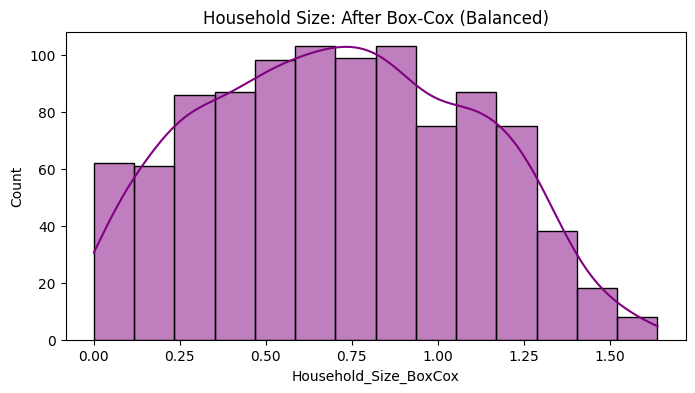

In [3]:
from scipy import stats

# 1. Apply Box-Cox transform
# The function gives us two things: the new data and the "Lambda" used
df['Household_Size_BoxCox'], optimal_lambda = stats.boxcox(df['Household_Size'])

print(f"Optimal Lambda found by computer: {optimal_lambda:.4f}")

# 2. Check the new data
print("\nNew Household Size (After Box-Cox):")
print(df['Household_Size_BoxCox'].head())

# 3. Draw the new picture
plt.figure(figsize=(8, 4))
sns.histplot(df['Household_Size_BoxCox'], kde=True, color='purple')
plt.title("Household Size: After Box-Cox (Balanced)")
plt.show()

### Summary from Lecture Slides:
1. **Normal Distribution**: Many algorithms assume data is normal. Distribution fitting helps us follow this rule.
2. **Positive Values**: Remember, if your data has 0 or negative numbers, you cannot use Box-Cox (you might need to add a small number like +1 first).
3. **Automated Search**: We use software to find the best Lambda automatically to get the "maximum log-likelihood."